## Importing Libraries

In [1]:
import os
from google.colab import drive # either use file off the drive
from google.colab import files # or upload the file to use temporarily

## Mounting Colab Notebooks Folder on Google Drive

In [2]:
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/Colab Notebooks')
# os.path.exists('/content/drive/My Drive/Colab Notebooks')

## Uploading Files

In [3]:
upload = files.upload()

Saving Volve_Production_Data.xlsx to Volve_Production_Data.xlsx


## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

## Importing and Cleaning Data + Visualization

In [5]:
all_data = pd.read_excel('Volve_Production_Data.xlsx')
all_data

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15629,2016-09-14,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.07776,0.22879,0.01862,0.0,0.0,0.0,NaN,production,OP
15630,2016-09-15,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.08545,0.22914,0.00631,0.0,0.0,0.0,NaN,production,OP
15631,2016-09-16,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.08544,0.22896,0.01181,0.0,0.0,0.0,NaN,production,OP
15632,2016-09-17,NO 15/9-F-5 AH,5769,15/9-F-5,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.07497,0.22846,0.02576,0.0,0.0,0.0,NaN,production,OP


In [6]:
column_names = all_data.columns
column_names

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [7]:
all_data = all_data[(all_data['FLOW_KIND'] == 'production')][['DATEPRD', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']]
all_data = all_data.sort_values(by = ['NPD_WELL_BORE_NAME', 'DATEPRD'])
all_data

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2014-04-07,15/9-F-1 C,0.0,0.00000,0.00000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN,NaN,0.00000,1.003059,0.00000,0.00000,0.00000,0.0,0.0,0.0
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN,NaN,0.00000,0.979008,0.00000,0.00000,0.00000,0.0,0.0,0.0
3,2014-04-10,15/9-F-1 C,0.0,NaN,NaN,NaN,0.00000,0.545759,0.00000,0.00000,0.00000,0.0,0.0,0.0
4,2014-04-11,15/9-F-1 C,0.0,310.37614,96.87589,277.27826,0.00000,1.215987,33.09788,10.47992,33.07195,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15628,2016-09-13,15/9-F-5,0.0,NaN,NaN,NaN,0.28463,0.673718,0.08545,0.22889,0.03741,0.0,0.0,0.0
15629,2016-09-14,15/9-F-5,0.0,NaN,NaN,NaN,0.27272,0.636088,0.07776,0.22879,0.01862,0.0,0.0,0.0
15630,2016-09-15,15/9-F-5,0.0,NaN,NaN,NaN,0.28686,0.670794,0.08545,0.22914,0.00631,0.0,0.0,0.0
15631,2016-09-16,15/9-F-5,0.0,NaN,NaN,NaN,0.28604,0.664393,0.08544,0.22896,0.01181,0.0,0.0,0.0


In [8]:
well_names = all_data['NPD_WELL_BORE_NAME'].value_counts()
well_names

,count
NPD_WELL_BORE_NAME,
15/9-F-14,3056
15/9-F-12,3056
15/9-F-11,1165
15/9-F-15 D,978
15/9-F-1 C,746
15/9-F-5,160


In [9]:
start_dates = all_data.groupby('NPD_WELL_BORE_NAME')['DATEPRD'].min().sort_values()
start_dates

,DATEPRD
NPD_WELL_BORE_NAME,
15/9-F-12,2008-02-12
15/9-F-14,2008-02-12
15/9-F-11,2013-07-08
15/9-F-15 D,2014-01-12
15/9-F-1 C,2014-04-07
15/9-F-5,2016-04-11


In [10]:
end_dates = all_data.groupby('NPD_WELL_BORE_NAME')['DATEPRD'].max().sort_values()
end_dates

,DATEPRD
NPD_WELL_BORE_NAME,
15/9-F-1 C,2016-04-21
15/9-F-11,2016-09-17
15/9-F-12,2016-09-17
15/9-F-14,2016-09-17
15/9-F-15 D,2016-09-17
15/9-F-5,2016-09-17


In [11]:
null_values_by_well = all_data[all_data.isnull().any(axis=1)]
# null_values_by_well = null_values_by_well.groupby('NPD_WELL_BORE_NAME').apply(lambda x: x.isnull().sum().sum()).sort_values() # using this showed that 15/9-F-5 had no missing values
null_values_by_well = null_values_by_well.groupby('NPD_WELL_BORE_NAME').apply(lambda x: x.isnull().sum()) # using this shows that 15/9-F-5 is missing all values for 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING'
null_values_by_well

<ipython-input-11-dd573b87e45b>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  null_values_by_well = null_values_by_well.groupby('NPD_WELL_BORE_NAME').apply(lambda x: x.isnull().sum()) # using this shows that 15/9-F-5 is missing all values for 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING'


,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
NPD_WELL_BORE_NAME,,,,,,,,,,,,,,
15/9-F-1 C,0,0,0,3,3,3,729,0,0,0,0,0,0,0
15/9-F-11,0,0,0,6,6,6,6,2,6,6,6,0,0,0
15/9-F-12,0,0,0,6,6,6,13,44,0,0,0,0,0,0
15/9-F-14,0,0,0,6,6,6,523,196,0,0,0,0,0,0
15/9-F-5,0,0,0,160,160,160,0,0,0,9,0,0,0,0


In [12]:
null_values = all_data.isnull().sum()
null_values

,0
DATEPRD,0
NPD_WELL_BORE_NAME,0
ON_STREAM_HRS,0
AVG_DOWNHOLE_PRESSURE,181
AVG_DOWNHOLE_TEMPERATURE,181
AVG_DP_TUBING,181
AVG_ANNULUS_PRESS,1271
AVG_CHOKE_SIZE_P,242
AVG_WHP_P,6
AVG_WHT_P,15


In [13]:
# data = data.dropna() # quick and dirty - suitable if selecting well bores with few null values, but other approaches would be more suitable if columns are missing too many values

columns_to_interpolate = ['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE']

def interpolation(group):
    for col in columns_to_interpolate:
        group[col] = group[col].interpolate(method='linear', limit_direction = 'both') # applying interpolation to fill in any missing values
    return group

data = all_data.groupby('NPD_WELL_BORE_NAME').apply(interpolation)

# verifying no empty cells in dataframe
null_values_after_interpolation = data.isnull().sum()
null_values_after_interpolation

<ipython-input-13-2ea06de5206a>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = all_data.groupby('NPD_WELL_BORE_NAME').apply(interpolation)


,0
DATEPRD,0
NPD_WELL_BORE_NAME,0
ON_STREAM_HRS,0
AVG_DOWNHOLE_PRESSURE,160
AVG_DOWNHOLE_TEMPERATURE,160
AVG_DP_TUBING,160
AVG_ANNULUS_PRESS,0
AVG_CHOKE_SIZE_P,0
AVG_WHP_P,0
AVG_WHT_P,0


In [14]:
# all production data is being included, except for 15/9-F-5 (despite missing 3 columns) becuase it started production last and will be used in a forecasting exercise later
data = data[(data['NPD_WELL_BORE_NAME'] != '15/9-F-5')][['DATEPRD', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL','BORE_GAS_VOL', 'BORE_WAT_VOL']]

In [15]:
data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
DATEPRD,9001,2013-05-01 08:30:39.795578368,2008-02-12 00:00:00,2011-03-28 00:00:00,2014-02-22 00:00:00,2015-05-27 00:00:00,2016-09-17 00:00:00,NaN
ON_STREAM_HRS,9001.0,20.196903,0.0,24.0,24.0,24.0,25.0,8.266102
AVG_DOWNHOLE_PRESSURE,9001.0,181.800635,0.0,0.0,232.949281,255.380762,397.58855,109.683291
AVG_DOWNHOLE_TEMPERATURE,9001.0,77.151837,0.0,0.0,103.189949,106.273233,108.502178,45.648598
AVG_DP_TUBING,9001.0,153.955188,0.0,83.320038,175.512264,204.266673,345.90677,76.745933
AVG_ANNULUS_PRESS,9001.0,12.729303,0.0,0.0,14.808484,20.608424,30.019828,9.328279
AVG_CHOKE_SIZE_P,9001.0,53.901255,0.0,15.489164,51.120816,99.783163,100.0,36.887827
AVG_WHP_P,9001.0,45.793309,0.0,31.419948,38.33721,57.77963,137.31103,24.729518
AVG_WHT_P,9001.0,68.103189,0.0,58.882811,80.275451,88.111511,93.509584,27.708511
DP_CHOKE_SIZE,9001.0,19.488055,0.0,3.479946,9.888581,27.401064,125.71857,22.626218


In [16]:
datetime_col = data.select_dtypes(include=['datetime']).columns[0]
str_col = data.select_dtypes(include=['object']).columns[0]
exclude_col = [datetime_col, str_col]
# exclude_col = [datetime_col]
data.loc[:, data.columns.difference(exclude_col)] = data.loc[:, data.columns.difference(exclude_col)].clip(lower=0) # setting any negative values to 0

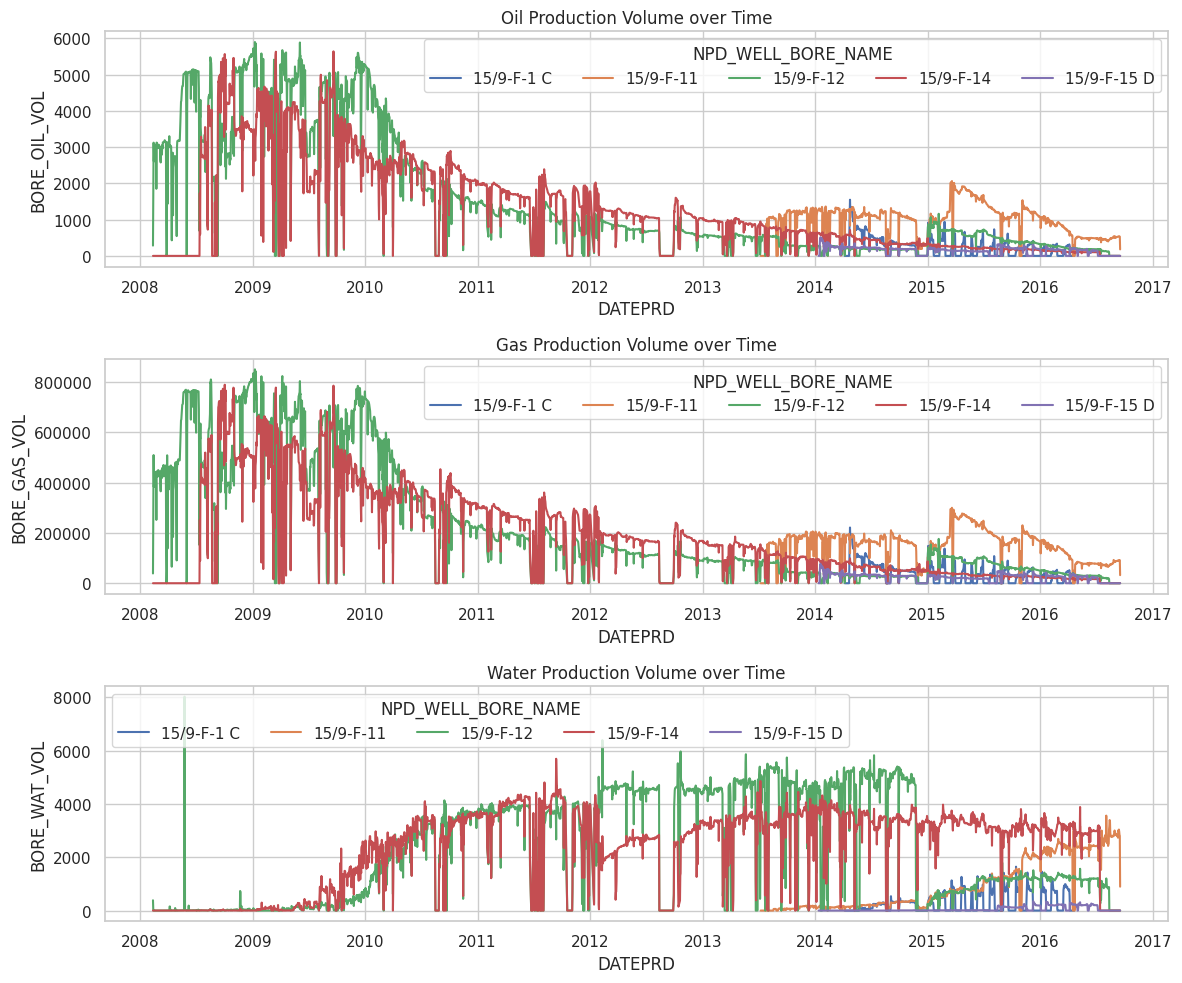

In [17]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# sns.lineplot(data=data, x='DATEPRD', y='BORE_OIL_VOL', ax=axes[0])
sns.lineplot(data=data, x='DATEPRD', y='BORE_OIL_VOL', ax=axes[0], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[0].set_title('Oil Production Volume over Time')
axes[0].set_xlabel('DATEPRD')
axes[0].set_ylabel('BORE_OIL_VOL')
axes[0].legend(title='NPD_WELL_BORE_NAME', loc='upper right', ncol=5)

# sns.lineplot(data=data, x='DATEPRD', y='BORE_GAS_VOL', ax=axes[1])
sns.lineplot(data=data, x='DATEPRD', y='BORE_GAS_VOL', ax=axes[1], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[1].set_title('Gas Production Volume over Time')
axes[1].set_xlabel('DATEPRD')
axes[1].set_ylabel('BORE_GAS_VOL')
axes[1].legend(title='NPD_WELL_BORE_NAME', loc='upper right', ncol=5)

# sns.lineplot(data=data, x='DATEPRD', y='BORE_WAT_VOL', ax=axes[2])
sns.lineplot(data=data, x='DATEPRD', y='BORE_WAT_VOL', ax=axes[2], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[2].set_title('Water Production Volume over Time')
axes[2].set_xlabel('DATEPRD')
axes[2].set_ylabel('BORE_WAT_VOL')
axes[2].legend(title='NPD_WELL_BORE_NAME', loc='upper left', ncol=5)

plt.tight_layout()
plt.show()

In [18]:
data = data[data['BORE_WAT_VOL'] <= 7000]

In [19]:
columns_to_average = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE']
columns_to_sum = ['BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL']

daily_avg = data.groupby('DATEPRD')[columns_to_average].mean().reset_index() # grouping by DATEPRD and calculating the average of these columns
daily_sum = data.groupby('DATEPRD')[columns_to_sum].sum().reset_index() # grouping by DATEPRD and aggregating the production of oil, gas, and water

field_data = pd.concat([daily_avg, daily_sum], axis=1)
field_data= field_data.loc[:, ~field_data.columns.duplicated()] # to remove duplicate DATEPRD column coming from either daily_avg or daily_sum

field_data

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2008-02-12,5.750000,154.027970,52.209045,100.625000,9.319778,7.242216,53.402970,8.147359,46.266978,284.65,38888.67,385.01
1,2008-02-13,12.000000,151.516759,52.701348,91.072471,8.233321,11.416493,60.444288,26.687165,44.843914,1869.70,285246.16,7.13
2,2008-02-14,11.250000,147.793031,52.887743,90.933943,6.329795,15.624983,56.859087,36.368815,40.084983,3124.09,509954.88,1.16
3,2008-02-15,11.575000,148.831351,52.875938,90.416030,2.632056,14.259465,58.415321,34.997972,42.158695,2608.28,383426.67,0.97
4,2008-02-16,12.000000,147.967759,52.905557,90.250522,6.192347,15.113951,57.717237,35.759174,41.231908,3051.80,418474.00,4.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,2016-09-13,6.000000,149.826548,48.825328,145.795233,13.276425,25.735381,9.467989,20.955164,6.596312,543.81,88042.16,3036.83
3052,2016-09-14,6.000000,149.779171,48.826467,145.759786,13.315494,25.784264,9.457880,21.194998,6.589441,541.88,90188.97,2963.49
3053,2016-09-15,6.000000,149.711370,48.827110,145.706549,13.280454,25.738276,9.446206,20.647362,6.616486,534.87,91890.07,2838.87
3054,2016-09-16,6.000000,149.699779,48.827556,145.701988,13.278240,25.772602,9.437236,20.901993,6.624574,530.27,91579.73,2802.75


## Preparing for Training + Visualization

In [20]:
scaler = MinMaxScaler()

columns = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL'] # 'BORE_GAS_VOL', 'BORE_WAT_VOL'
columns_to_scale = field_data[columns].copy()
data_scaled = scaler.fit_transform(columns_to_scale)
scaled_data = pd.DataFrame(data_scaled, columns = columns)

scaled_data.insert(0, 'DATEPRD', field_data['DATEPRD'])
# scaled_data.insert(1, 'NPD_WELL_BORE_NAME', data['NPD_WELL_BORE_NAME'])

scaled_data

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL
0,2008-02-12,0.230000,0.497229,0.487731,0.327914,0.379730,0.072422,0.433558,0.088548,0.373999,0.030164
1,2008-02-13,0.480000,0.489123,0.492330,0.296785,0.335463,0.114165,0.490723,0.290046,0.362416,0.198133
2,2008-02-14,0.450000,0.477102,0.494071,0.296333,0.257904,0.156250,0.461616,0.395269,0.323680,0.331061
3,2008-02-15,0.463000,0.480454,0.493961,0.294646,0.107242,0.142595,0.474251,0.380371,0.340559,0.276400
4,2008-02-16,0.480000,0.477666,0.494238,0.294106,0.252304,0.151140,0.468583,0.388644,0.333015,0.323400
...,...,...,...,...,...,...,...,...,...,...,...
3051,2016-09-13,0.240000,0.483666,0.456121,0.475114,0.540941,0.257354,0.076867,0.227748,0.051091,0.057628
3052,2016-09-14,0.240000,0.483513,0.456131,0.474999,0.542533,0.257843,0.076785,0.230355,0.051035,0.057423
3053,2016-09-15,0.240000,0.483295,0.456137,0.474825,0.541105,0.257383,0.076690,0.224403,0.051255,0.056680
3054,2016-09-16,0.240000,0.483257,0.456142,0.474810,0.541015,0.257726,0.076617,0.227170,0.051321,0.056193


In [21]:
X = scaled_data[['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE']]
Y = scaled_data[['BORE_OIL_VOL']]

X = X.values
Y = Y.values

In [22]:
def datasplit(X, Y, train_size = 0.7, validation_size = 0.15, test_size = 0.15):

    assert train_size + validation_size + test_size == 1.0

    total_samples = X.shape[0]
    training = int(train_size * total_samples)
    validation = int(validation_size * total_samples)
    test = total_samples - (training + validation)

    X_train = X[:training]
    Y_train = Y[:training]

    X_val = X[training:training+validation]
    Y_val = Y[training:training+validation]

    X_test = X[training+validation:]
    Y_test = Y[training+validation:]

    print(f"X_train shape: {X_train.shape}")
    print(f"Y_train shape: {Y_train.shape}")
    print(f"X_val shape: {X_val.shape}")
    print(f"Y_val shape: {Y_val.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"Y_test shape: {Y_test.shape}")

    return X_train, Y_train, X_val, Y_val, X_test, Y_test

X_train, Y_train, X_val, Y_val, X_test, Y_test = datasplit(X, Y)

X_train shape: (2139, 9)
Y_train shape: (2139, 1)
X_val shape: (458, 9)
Y_val shape: (458, 1)
X_test shape: (459, 9)
Y_test shape: (459, 1)


<ipython-input-23-e5096a601c83>:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


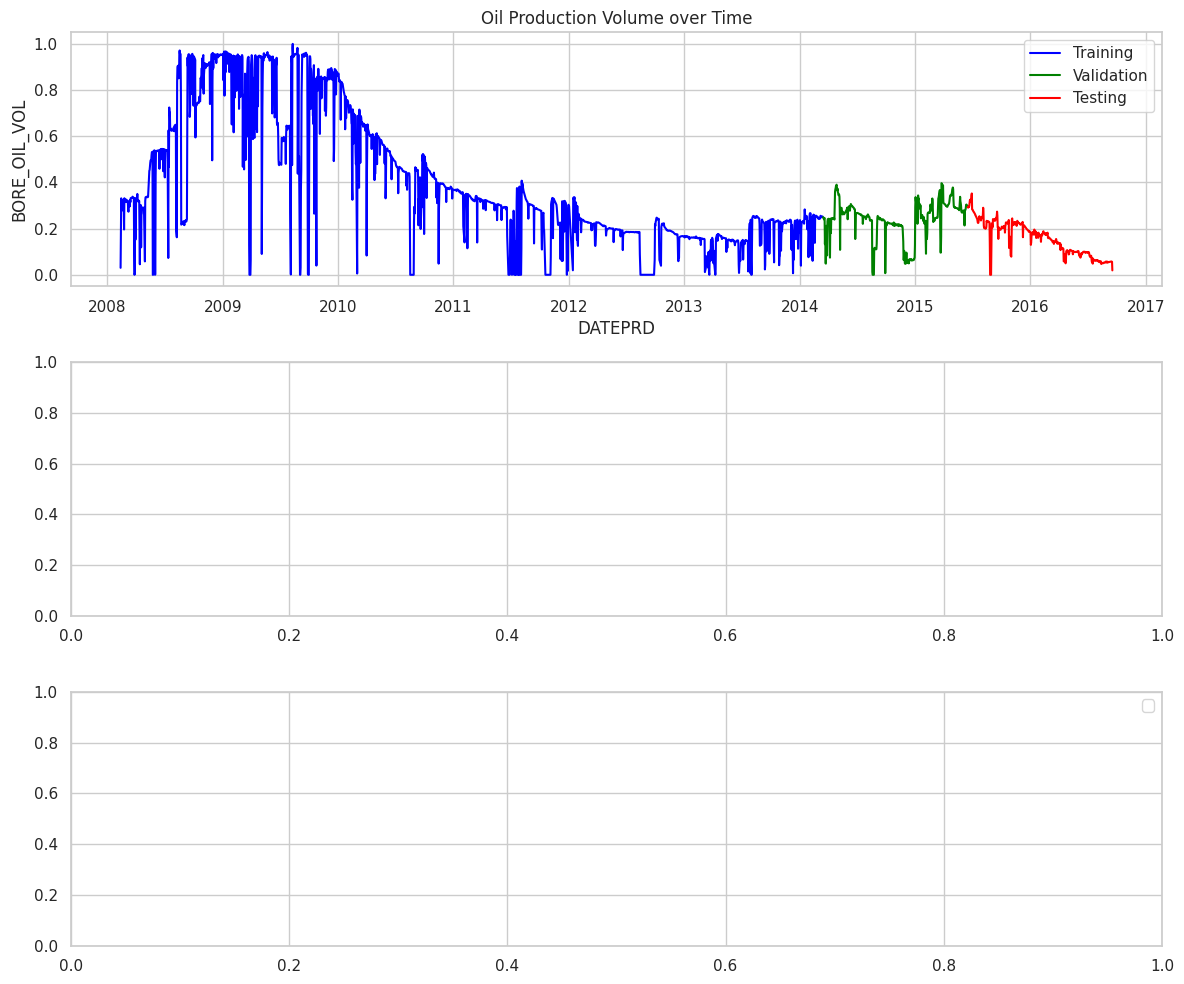

In [23]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

sns.lineplot(data=scaled_data[:Y_train.shape[0]], x='DATEPRD', y=Y_train[:, 0], label='Training', ax=axes[0], color='blue')
sns.lineplot(data=scaled_data[Y_train.shape[0]:Y_train.shape[0] + Y_val.shape[0]], x='DATEPRD', y=Y_val[:, 0], label='Validation', ax=axes[0], color='green')
sns.lineplot(data=scaled_data[Y_train.shape[0] + Y_val.shape[0]:], x='DATEPRD', y=Y_test[:, 0], label='Testing', ax=axes[0], color='red')
axes[0].set_title('Oil Production Volume over Time')
axes[0].set_xlabel('DATEPRD')
axes[0].set_ylabel('BORE_OIL_VOL')

# sns.lineplot(data=scaled_data[:Y_train.shape[0]], x='DATEPRD', y=Y_train[:, 1], label='Training', ax=axes[1], color='blue')
# sns.lineplot(data=scaled_data[Y_train.shape[0]:Y_train.shape[0] + Y_val.shape[0]], x='DATEPRD', y=Y_val[:, 1], label='Validation', ax=axes[1], color='green')
# sns.lineplot(data=scaled_data[Y_train.shape[0] + Y_val.shape[0]:], x='DATEPRD', y=Y_test[:, 1], label='Testing', ax=axes[1], color='red')
# axes[1].set_title('Gas Production Volume over Time')
# axes[1].set_xlabel('DATEPRD')
# axes[1].set_ylabel('BOR_GAS_VOL')

# sns.lineplot(data=scaled_data[:Y_train.shape[0]], x='DATEPRD', y=Y_train[:, 2], label='Training', ax=axes[2], color='blue')
# sns.lineplot(data=scaled_data[Y_train.shape[0]:Y_train.shape[0] + Y_val.shape[0]], x='DATEPRD', y=Y_val[:, 2], label='Validation', ax=axes[2], color='green')
# sns.lineplot(data=scaled_data[Y_train.shape[0] + Y_val.shape[0]:], x='DATEPRD', y=Y_test[:, 2], label='Testing', ax=axes[2], color='red')
# axes[2].set_title('Water Production Volume over Time')
# axes[2].set_xlabel('DATEPRD')
# axes[2].set_ylabel('BORE_WAT_VOL')

plt.tight_layout()
plt.legend()
plt.show()

## Defining Windowed Version of Data

This implementation attempts to forecast oil production 3 days in advance using the past 4 days' worth of operational data.

In [24]:
def windows(features, target, window_size, batch_size, horizon):
    dataset = tf.data.Dataset.from_tensor_slices((features, target))
    dataset = dataset.window(window_size + horizon, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda x, y: tf.data.Dataset.zip((x.batch(window_size + horizon), y.batch(window_size + horizon))))

    dataset = dataset.map(
        lambda x, y: (
            tf.concat(
                [
                    x[-window_size:, :9], # selecting operational features from t-3 to t
                    x[-window_size:, 9:] # selecting production features (IF used) from t-3 to t
                    ],
                axis=1),
            y[-horizon] # selecting target(s) at t+1 to t+horizon
            )
        )

    dataset = dataset.batch(batch_size).prefetch(1)

    return dataset

## Defining Windows and Iterator

In [25]:
window_size = 4
batch_size = 16
horizon = 3

train_set = windows(X_train, Y_train, window_size, batch_size, horizon)
val_set = windows(X_val, Y_val, window_size, batch_size, horizon)
test_set = windows(X_test, Y_test, window_size, batch_size, horizon)

In [26]:
train_iterator = iter(train_set) # creating an iterator to loop through the dataset
first_element = next(train_iterator) # calling the next  batch from the iterator

In [27]:
features_shape = first_element[0].shape
target_shape = first_element[1].shape

print("Features Shape:", features_shape)
print("Target Shape:", target_shape)

Features Shape: (16, 4, 9)
Target Shape: (16, 1)


## Defining Model

The model's architecture was loosely based on a literature review of various research papers (including Wang et al., 2022).

In [35]:
def LSTM_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters = 32, kernel_size = 2, activation = 'relu'),
        tf.keras.layers.LSTM(64, activation = 'relu'),
        tf.keras.layers.Dropout(0.5),
        # tf.keras.layers.Dense (8, activation = 'relu')
        tf.keras.layers.Dense(units = 3, activation = 'sigmoid')
    ])

    return model

## Specifying Training Parameters and Training Model

In [36]:
tf.keras.utils.set_random_seed(50)

model = LSTM_model()

epochs = 1000
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)
learning_rate = 0.0005

optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
loss = tf.keras.losses.MeanSquaredLogarithmicError()
model.compile(loss = loss, optimizer = optimizer)

history = model.fit(
    train_set,
    epochs = epochs,
    validation_data = val_set,
    shuffle = False,
    callbacks = [early_stopping],
    verbose = 1
)

Epoch 1/1000
    125/Unknown 6s 6ms/step - loss: 0.0361

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


134/134 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0365 - val_loss: 0.0122
Epoch 2/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0515 - val_loss: 0.0088
Epoch 3/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0508 - val_loss: 0.0091
Epoch 4/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0462 - val_loss: 0.0097
Epoch 5/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0392 - val_loss: 0.0111
Epoch 6/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0323 - val_loss: 0.0092
Epoch 7/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0259 - val_loss: 0.0058
Epoch 8/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0219 - val_loss: 0.0059
Epoch 9/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0185 - val_loss: 0.0036
Epoch 10/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0167 - val_loss: 0.0030
Epoch 11/1000
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0152 - val_loss: 0.0026
Epoch 12/1000
134/134 ━━━━━━━━━━━━━━

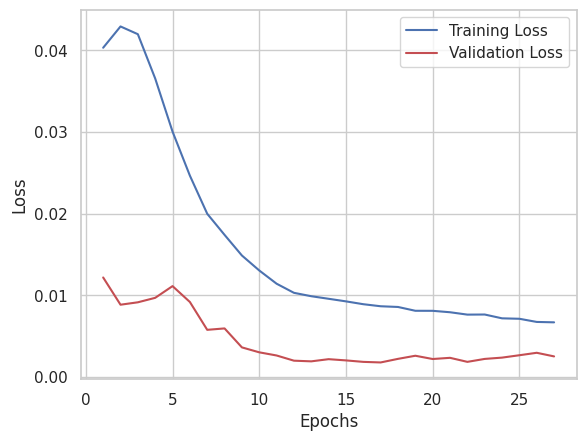

Training MSLE is 0.0066861119121313095
Validation MSLE is 0.0025132040027529


In [37]:
training_loss = model.history.history['loss']
validation_loss = model.history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

Final_Train_MSLE = training_loss[-1]
print(f"Training MSLE is {Final_Train_MSLE}")
Final_Val_MSLE = validation_loss[-1]
print(f"Validation MSLE is {Final_Val_MSLE}")

The curves are converging, which suggestions that the model should generalize well. The MSLE values are low and validation MSLE is lower than training MLSE so the model was trained effectively. The losses start relatively high and drop after about 10-15 epochs, after which the losses seem to stabilize. The early stopping criteria could be delayed to verify MSLE trends beyond 27 epochs but the convergence is expected to hold.

## Running Model to Forecast

In [38]:
predictions = model.predict(test_set)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


## Creating Dataset with Actual and Predicted Values + Visualization

In [39]:
reverse_scaling = pd.concat([pd.DataFrame(X_test[:, :10][window_size:]), pd.DataFrame(predictions)], axis=1)
unscaled_data = scaler.inverse_transform(reverse_scaling.iloc[:, :10])  # applying inverse transform
unscaled_data_trimmed = unscaled_data[-predictions.shape[0]:, :] # trimming unscaled_data to match number of rows in final_data below
final_data = field_data.iloc[-predictions.shape[0]:].copy() # extracting field_data rows corresponding to predictions
final_data['PREDICTED_OIL'] = unscaled_data_trimmed[:, -1] # assigning last column from unscaled_data_trimmed as 'PREDICTED_OIL' at end of final_data

# merging the 'PREDICTED_OIL' with appropriate rows from field_data based on 'DATEPRD'
# final_data = pd.merge(final_data[['DATEPRD', 'PREDICTED_OIL']], field_data[['DATEPRD'] + [col for col in field_data.columns if col != 'DATEPRD']], on='DATEPRD', how='left')

final_data

,DATEPRD,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,PREDICTED_OIL
2603,2015-06-23,24.000000,184.658479,83.951137,161.846285,13.032946,57.387411,34.653341,68.984477,6.180007,2944.26,435541.42,6150.97,2664.631044
2604,2015-06-24,24.000000,183.481575,83.974433,160.542230,13.129235,57.708178,34.785260,70.025849,6.317321,3049.28,448925.16,6291.96,2644.706818
2605,2015-06-25,24.000000,182.943582,83.968564,160.327074,13.273079,57.777963,34.455939,70.348237,5.980409,3038.21,447399.00,6313.23,2627.125825
2606,2015-06-26,24.000000,182.578180,83.971705,160.326112,13.140208,58.267437,34.200011,68.385122,5.704992,3078.13,450437.29,6365.02,2627.412964
2607,2015-06-27,24.000000,182.173392,83.983339,159.834192,13.245478,58.711367,34.276776,70.039159,5.488488,3090.54,451443.34,6420.81,2619.224306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,2016-09-13,6.000000,149.826548,48.825328,145.795233,13.276425,25.735381,9.467989,20.955164,6.596312,543.81,88042.16,3036.83,1037.709372
3052,2016-09-14,6.000000,149.779171,48.826467,145.759786,13.315494,25.784264,9.457880,21.194998,6.589441,541.88,90188.97,2963.49,1036.215251
3053,2016-09-15,6.000000,149.711370,48.827110,145.706549,13.280454,25.738276,9.446206,20.647362,6.616486,534.87,91890.07,2838.87,989.040402
3054,2016-09-16,6.000000,149.699779,48.827556,145.701988,13.278240,25.772602,9.437236,20.901993,6.624574,530.27,91579.73,2802.75,NaN


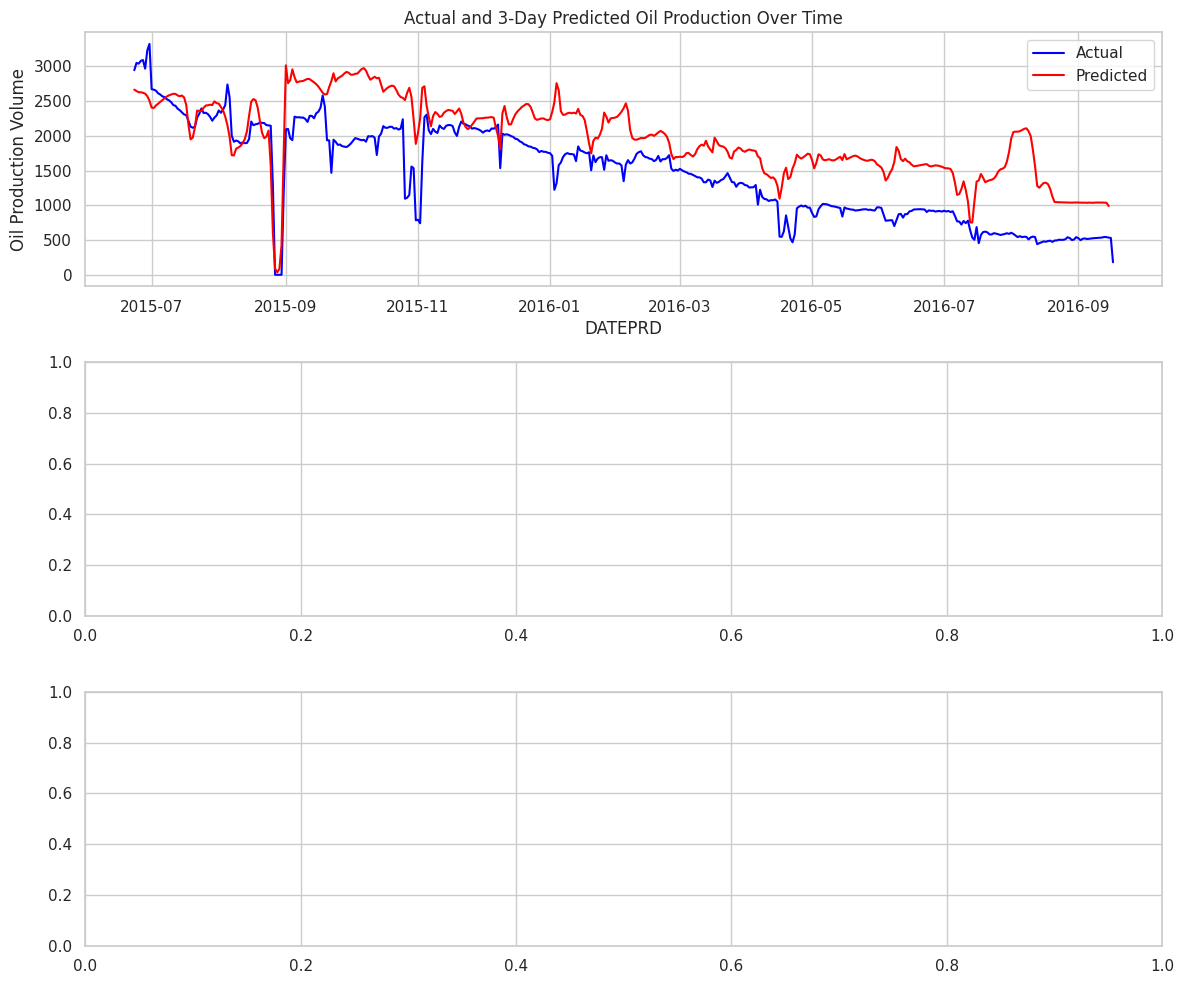

In [40]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

sns.lineplot(data=final_data, x='DATEPRD', y='BORE_OIL_VOL', label='Actual', ax=axes[0], color='blue')
sns.lineplot(data=final_data, x='DATEPRD', y='PREDICTED_OIL', label='Predicted', ax=axes[0], color='red')
axes[0].set_xlabel('DATEPRD')
axes[0].set_ylabel('Oil Production Volume')
axes[0].set_title('Actual and 3-Day Predicted Oil Production Over Time')
axes[0].legend()

# sns.lineplot(data=final_data, x='DATEPRD', y='BORE_GAS_VOL', label='Actual', ax=axes[1], color='blue')
# sns.lineplot(data=final_data, x='DATEPRD', y='PREDICTED_GAS', label='Predicted', ax=axes[1], color='red')
# axes[0].set_xlabel('DATEPRD')
# axes[1].set_ylabel('Gas Production Volume')
# axes[1].set_title('Predicted and Actual Gas Production Over Time')
# axes[1].legend()

# sns.lineplot(data=final_data, x='DATEPRD', y='BORE_WAT_VOL', label='Actual', ax=axes[2], color='blue')
# sns.lineplot(data=final_data, x='DATEPRD', y='PREDICTED_WATER', label='Predicted', ax=axes[2], color='red')
# axes[2].set_xlabel('DATEPRD')
# axes[2].set_ylabel('Water Production Volume')
# axes[2].set_title('Predicted and Actual Water Production Over Time')
# axes[2].legend()

plt.tight_layout()
plt.show()

The model is consistently forecasting a higher volume compared to the actual volume of oil produced and struggles to capture sudden changes; yet the overall declining trend is captured. In addition to the previously mentioned potential improvements to the model, a custom (asymmetrical) loss function that heavily punishes overestimation could be useful in dealing with the model’s tendency to overestimate.

However, there are a couple of points that are worth noting:
1.   While the sigmoid activation function may be affecting this bias, it was needed in this case to avoid forecasting negative volume production during the sharp drop around September 2015.
2.   It would be intuitive to assume that a window_size larger than 4 would give the model long enough to capture trends but the inverse was observed as the model forecasts were worse when larger window_size values were used.

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


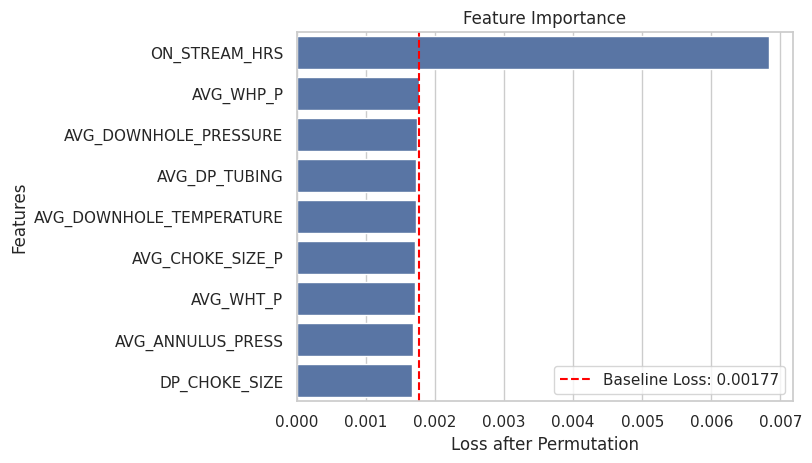

In [41]:
feature_names = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE']

def feature_importance_scores(model, dataset, baseline_loss):

    importance_scores = {}

    for feature_idx, feature_name in enumerate(feature_names):

        loss_difference = []

        for batch in dataset:

            X_batch, y_batch = batch
            X_permuted = X_batch.numpy().copy()

            np.random.shuffle(X_permuted[:, :, feature_idx]) # shuffling the specific feature across the time window
            permuted_loss = model.evaluate(X_permuted, y_batch, verbose = 0) # computing loss (MSLE in this case) after permutation

            loss_difference.append(permuted_loss) # tracking the differences

        permuted_loss_avg = np.mean(loss_difference) # averaging the difference over the batches
        importance_scores[feature_name] = permuted_loss_avg

    return importance_scores

baseline_loss = model.evaluate(val_set) # computing baesline loss (MSLE) on training dataset

importance_scores = feature_importance_scores(model, val_set, baseline_loss) # getting actual MSLE values after permutation

importance_scores_sorted = sorted(importance_scores.items(), key=lambda x: x[1], reverse=True)
features, permuted_losses = zip(*importance_scores_sorted) # extracing feature names and scores

# plotting feature importance
sns.barplot(x = permuted_losses, y = features)
plt.axvline(x = baseline_loss, color = 'red', linestyle = '--', label = f'Baseline Loss: {baseline_loss:.5f}') # adding baseline loss as reference line
plt.xlabel("Loss after Permutation")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.legend()
plt.show()

With the removal of BORE_OIL/GAS/WAT_VOL from the model features, ON_STREAM_HRS is by far the most important variable. However, given that the baseline loss (0.00177) is lower than the validation MSLE (0.00251) and the relatively low importance of the remaining operational features, it seems that the model may be struggling with fit as there are insufficient data and/or insufficient operational features.

## Saving and Loading Model

In [42]:
from tensorflow.keras.models import load_model

model.save('LSTM_Model_F5.keras')
model_deploy = load_model('LSTM_Model_F5.keras')

## Cleaning Data of 15/9-F-5 + Visualization

In [43]:
last_well = all_data[(all_data['NPD_WELL_BORE_NAME'] == '15/9-F-5')][['DATEPRD', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL','BORE_GAS_VOL', 'BORE_WAT_VOL']]
last_well

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
15473,2016-04-11,15/9-F-5,0.0,NaN,NaN,NaN,0.00000,0.729358,0.00000,NaN,0.00000,0.0,0.0,0.0
15474,2016-04-12,15/9-F-5,0.0,NaN,NaN,NaN,0.00000,0.718132,0.00000,NaN,0.00000,0.0,0.0,0.0
15475,2016-04-13,15/9-F-5,0.0,NaN,NaN,NaN,4.14780,0.730815,4.67647,NaN,0.00000,0.0,0.0,0.0
15476,2016-04-14,15/9-F-5,0.0,NaN,NaN,NaN,10.44277,0.720336,11.78062,NaN,0.00000,0.0,0.0,0.0
15477,2016-04-15,15/9-F-5,0.0,NaN,NaN,NaN,10.36559,0.776804,11.70474,NaN,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15628,2016-09-13,15/9-F-5,0.0,NaN,NaN,NaN,0.28463,0.673718,0.08545,0.22889,0.03741,0.0,0.0,0.0
15629,2016-09-14,15/9-F-5,0.0,NaN,NaN,NaN,0.27272,0.636088,0.07776,0.22879,0.01862,0.0,0.0,0.0
15630,2016-09-15,15/9-F-5,0.0,NaN,NaN,NaN,0.28686,0.670794,0.08545,0.22914,0.00631,0.0,0.0,0.0
15631,2016-09-16,15/9-F-5,0.0,NaN,NaN,NaN,0.28604,0.664393,0.08544,0.22896,0.01181,0.0,0.0,0.0


In [44]:
null_values_last_well = last_well.isnull().sum()
null_values_last_well

,0
DATEPRD,0
NPD_WELL_BORE_NAME,0
ON_STREAM_HRS,0
AVG_DOWNHOLE_PRESSURE,160
AVG_DOWNHOLE_TEMPERATURE,160
AVG_DP_TUBING,160
AVG_ANNULUS_PRESS,0
AVG_CHOKE_SIZE_P,0
AVG_WHP_P,0
AVG_WHT_P,9


In [45]:
# filling in missing values in last_well with corresponding values from field_data

filling = pd.merge(last_well, field_data, on='DATEPRD', how='left', suffixes=('', '_field')) # merge last_well and field_data on 'DATEPRD'

for column in last_well.columns:
    if filling[column].isnull().any():
        filling[column] = filling[column].fillna(filling[f'{column}_field'])

last_well_data = filling[last_well.columns] # keeping columns from last_well only

last_well = last_well.sort_values(by = ['NPD_WELL_BORE_NAME', 'DATEPRD'])
last_well_data

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2016-04-11,15/9-F-5,0.0,197.596886,82.804526,185.030818,0.00000,0.729358,0.00000,60.116845,0.00000,0.0,0.0,0.0
1,2016-04-12,15/9-F-5,0.0,197.091709,82.731648,184.816296,0.00000,0.718132,0.00000,60.977488,0.00000,0.0,0.0,0.0
2,2016-04-13,15/9-F-5,0.0,197.493556,82.685397,185.040909,4.14780,0.730815,4.67647,61.147503,0.00000,0.0,0.0,0.0
3,2016-04-14,15/9-F-5,0.0,198.130503,82.654304,185.386334,10.44277,0.720336,11.78062,61.928728,0.00000,0.0,0.0,0.0
4,2016-04-15,15/9-F-5,0.0,198.914057,82.627147,185.972161,10.36559,0.776804,11.70474,61.228526,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2016-09-13,15/9-F-5,0.0,149.826548,48.825328,145.795233,0.28463,0.673718,0.08545,0.228890,0.03741,0.0,0.0,0.0
156,2016-09-14,15/9-F-5,0.0,149.779171,48.826467,145.759786,0.27272,0.636088,0.07776,0.228790,0.01862,0.0,0.0,0.0
157,2016-09-15,15/9-F-5,0.0,149.711370,48.827110,145.706549,0.28686,0.670794,0.08545,0.229140,0.00631,0.0,0.0,0.0
158,2016-09-16,15/9-F-5,0.0,149.699779,48.827556,145.701988,0.28604,0.664393,0.08544,0.228960,0.01181,0.0,0.0,0.0


In [46]:
null_values_last_well = last_well_data.isnull().sum()
null_values_last_well

,0
DATEPRD,0
NPD_WELL_BORE_NAME,0
ON_STREAM_HRS,0
AVG_DOWNHOLE_PRESSURE,0
AVG_DOWNHOLE_TEMPERATURE,0
AVG_DP_TUBING,0
AVG_ANNULUS_PRESS,0
AVG_CHOKE_SIZE_P,0
AVG_WHP_P,0
AVG_WHT_P,0


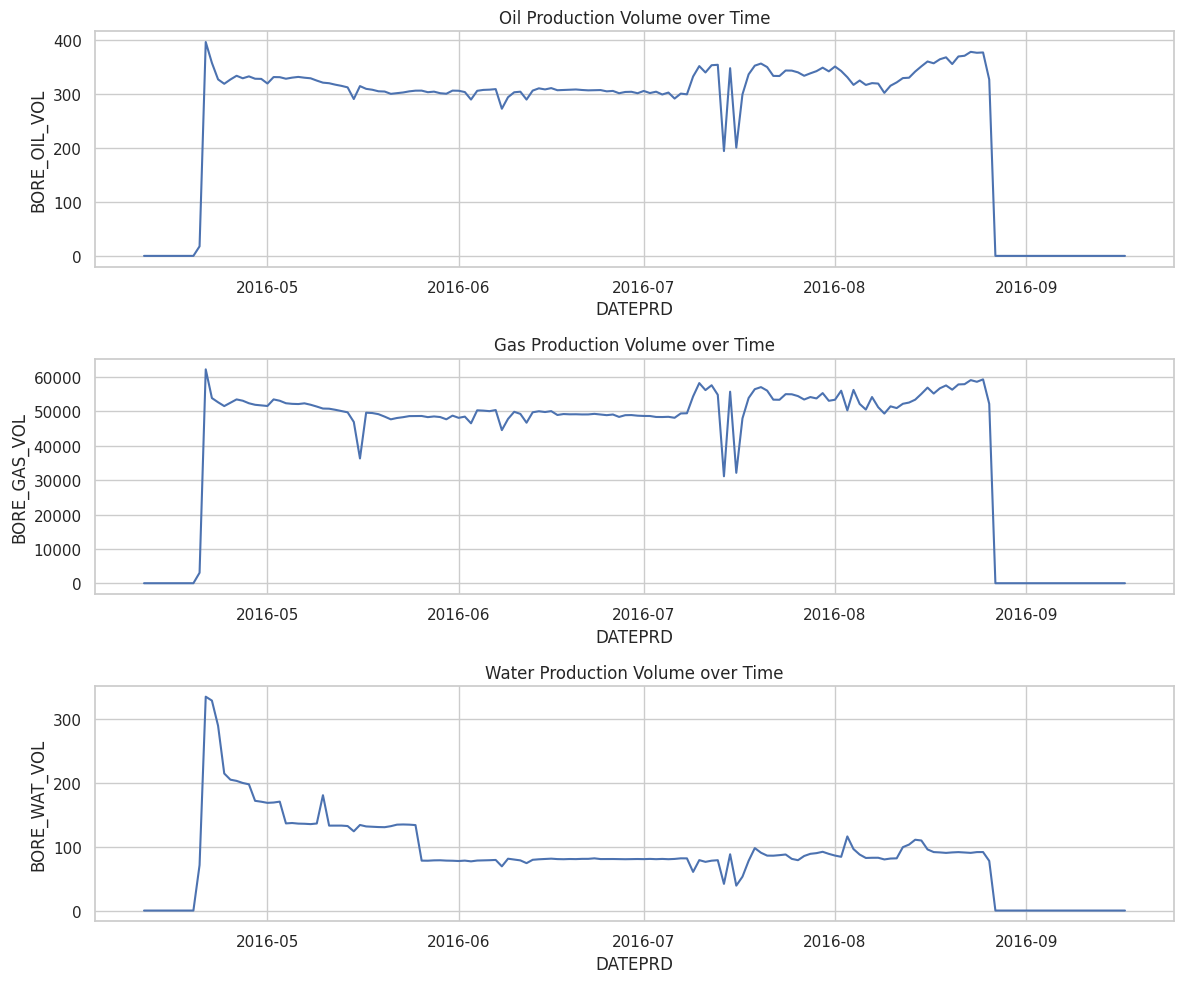

In [47]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

sns.lineplot(data=last_well_data, x='DATEPRD', y='BORE_OIL_VOL', ax=axes[0])
# sns.lineplot(data=data, x='DATEPRD', y='BORE_OIL_VOL', ax=axes[0], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[0].set_title('Oil Production Volume over Time')
axes[0].set_xlabel('DATEPRD')
axes[0].set_ylabel('BORE_OIL_VOL')
# axes[0].legend(title='NPD_WELL_BORE_NAME', loc='upper right', ncol=5)

sns.lineplot(data=last_well_data, x='DATEPRD', y='BORE_GAS_VOL', ax=axes[1])
# sns.lineplot(data=data, x='DATEPRD', y='BORE_GAS_VOL', ax=axes[1], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[1].set_title('Gas Production Volume over Time')
axes[1].set_xlabel('DATEPRD')
axes[1].set_ylabel('BORE_GAS_VOL')
# axes[1].legend(title='NPD_WELL_BORE_NAME', loc='upper right', ncol=5)

sns.lineplot(data=last_well_data, x='DATEPRD', y='BORE_WAT_VOL', ax=axes[2])
# sns.lineplot(data=data, x='DATEPRD', y='BORE_WAT_VOL', ax=axes[2], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[2].set_title('Water Production Volume over Time')
axes[2].set_xlabel('DATEPRD')
axes[2].set_ylabel('BORE_WAT_VOL')
# axes[2].legend(title='NPD_WELL_BORE_NAME', loc='upper left', ncol=5)

plt.tight_layout()
plt.show()

In [48]:
# F5_data = last_well_data # keeping all data (including 0s at tail ends) and renaming for consistency

# last_well_data.head(30)
# last_well_data.tail(30)

F5_data = last_well_data[(last_well_data['DATEPRD'] > '2016-04-18') & (last_well_data['DATEPRD'] < '2016-08-28')] # removing tail ends due to 0s
F5_data

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
8,2016-04-19,15/9-F-5,0.00000,207.928007,82.358464,194.357797,10.396730,0.745271,11.736450,60.913099,0.000000,0.00,0.00,0.00
9,2016-04-20,15/9-F-5,5.84167,207.520074,82.340175,192.356508,14.578669,16.665578,12.231850,21.797570,1.505540,17.75,3048.80,71.05
10,2016-04-21,15/9-F-5,24.00000,156.108849,61.964591,144.387096,25.363551,80.414591,26.122884,54.168559,0.622656,396.80,62250.56,334.07
11,2016-04-22,15/9-F-5,24.00000,197.406380,77.361517,176.231753,28.703051,79.400186,26.003136,57.744172,0.559027,358.12,53895.45,327.99
12,2016-04-23,15/9-F-5,24.00000,194.822174,77.520316,171.977557,29.454258,79.459730,26.028061,57.133325,0.571334,327.46,52669.63,288.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2016-08-23,15/9-F-5,24.00000,149.332812,48.760886,145.249542,25.073654,100.000000,23.728094,56.861513,0.190029,378.55,59119.57,90.11
135,2016-08-24,15/9-F-5,24.00000,149.308124,48.762768,145.220458,24.933768,100.000000,23.703260,56.248741,0.167719,376.86,58632.31,91.32
136,2016-08-25,15/9-F-5,24.00000,149.284389,48.764552,145.203307,24.930640,100.000000,23.641755,57.883541,0.102264,377.44,59337.43,91.38
137,2016-08-26,15/9-F-5,20.59167,149.246452,48.766429,145.169658,24.828273,83.876813,23.970309,55.871967,0.420182,327.16,52209.60,77.52


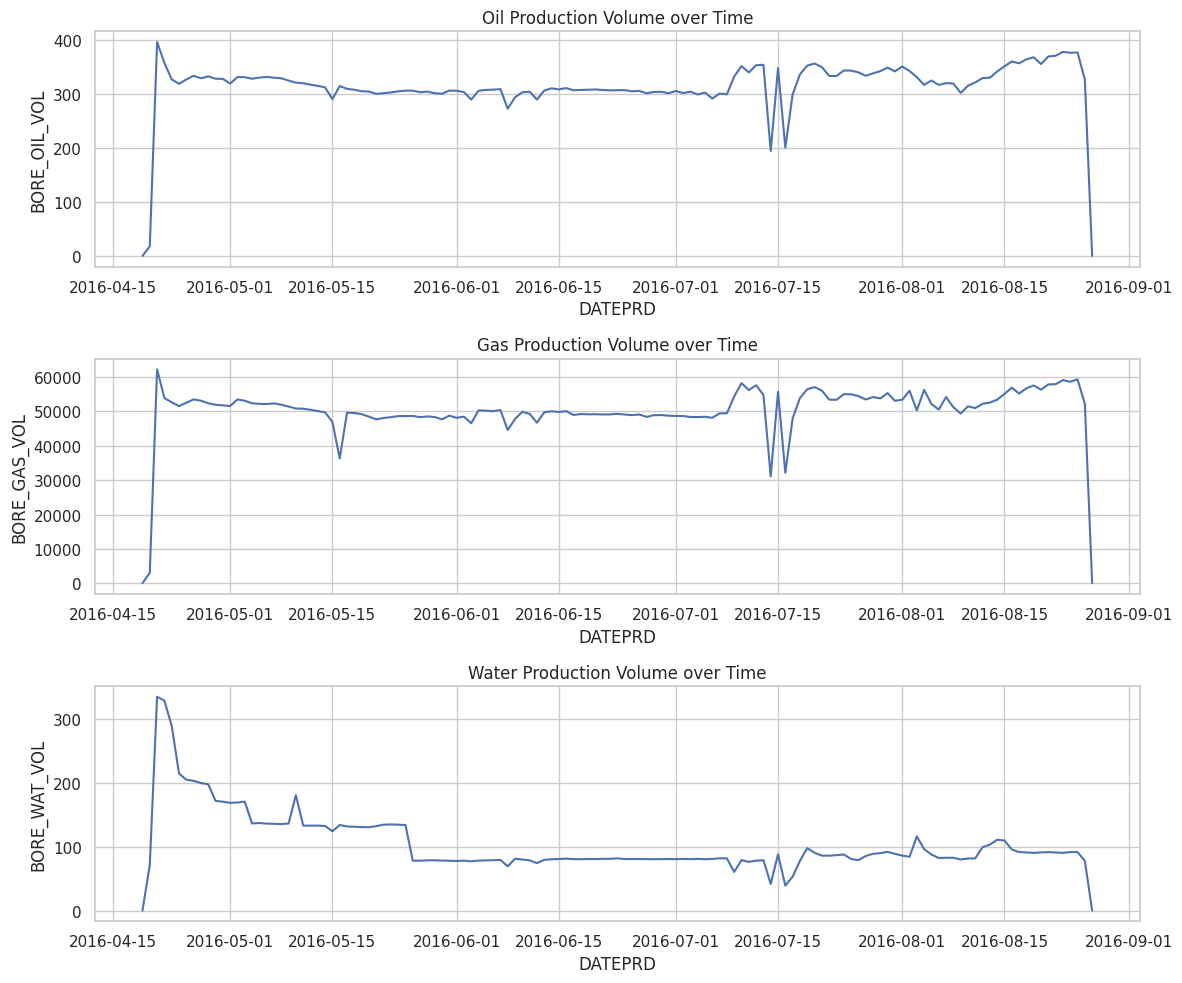

In [49]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

sns.lineplot(data=F5_data, x='DATEPRD', y='BORE_OIL_VOL', ax=axes[0])
# sns.lineplot(data=data, x='DATEPRD', y='BORE_OIL_VOL', ax=axes[0], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[0].set_title('Oil Production Volume over Time')
axes[0].set_xlabel('DATEPRD')
axes[0].set_ylabel('BORE_OIL_VOL')
# axes[0].legend(title='NPD_WELL_BORE_NAME', loc='upper right', ncol=5)

sns.lineplot(data=F5_data, x='DATEPRD', y='BORE_GAS_VOL', ax=axes[1])
# sns.lineplot(data=data, x='DATEPRD', y='BORE_GAS_VOL', ax=axes[1], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[1].set_title('Gas Production Volume over Time')
axes[1].set_xlabel('DATEPRD')
axes[1].set_ylabel('BORE_GAS_VOL')
# axes[1].legend(title='NPD_WELL_BORE_NAME', loc='upper right', ncol=5)

sns.lineplot(data=F5_data, x='DATEPRD', y='BORE_WAT_VOL', ax=axes[2])
# sns.lineplot(data=data, x='DATEPRD', y='BORE_WAT_VOL', ax=axes[2], hue='NPD_WELL_BORE_NAME', errorbar=None)
axes[2].set_title('Water Production Volume over Time')
axes[2].set_xlabel('DATEPRD')
axes[2].set_ylabel('BORE_WAT_VOL')
# axes[2].legend(title='NPD_WELL_BORE_NAME', loc='upper left', ncol=5)

plt.tight_layout()
plt.show()

In [50]:
F5_data.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
DATEPRD,131,2016-06-23 00:00:00,2016-04-19 00:00:00,2016-05-21 12:00:00,2016-06-23 00:00:00,2016-07-25 12:00:00,2016-08-27 00:00:00,NaN
ON_STREAM_HRS,131.0,22.697138,0.0,24.0,24.0,24.0,24.0,4.325459
AVG_DOWNHOLE_PRESSURE,131.0,183.669427,149.092983,179.040523,181.259282,191.598155,232.870985,22.986377
AVG_DOWNHOLE_TEMPERATURE,131.0,70.941609,48.725037,73.244394,77.693286,77.877366,82.358464,11.489249
AVG_DP_TUBING,131.0,173.215181,144.387096,165.927048,167.578161,173.526712,225.801894,21.860527
AVG_ANNULUS_PRESS,131.0,21.251062,10.39673,19.842749,20.539254,23.410586,29.454258,2.541322
AVG_CHOKE_SIZE_P,131.0,83.938887,0.745271,79.451793,80.276079,100.0,100.0,14.840248
AVG_WHP_P,131.0,24.345009,11.73645,23.684236,25.598881,25.734455,28.251582,2.482674
AVG_WHT_P,131.0,49.790296,21.79757,46.972582,49.228766,53.165747,60.913099,5.085966
DP_CHOKE_SIZE,131.0,0.388911,0.0,0.16608,0.23153,0.328681,7.62027,0.789739


In [51]:
F5_scaler = MinMaxScaler()

columns2 = ['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL'] # 'BORE_GAS_VOL', 'BORE_WAT_VOL'
columns_to_scale2 = F5_data[columns2].copy()
F5_scaled = F5_scaler.fit_transform(columns_to_scale2)
scaled_F5 = pd.DataFrame(F5_scaled, columns=columns2)

# scaled_F5.insert(0, 'DATEPRD', field_data['DATEPRD'])
# scaled_data.insert(1, 'NPD_WELL_BORE_NAME', data['NPD_WELL_BORE_NAME'])

scaled_F5

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL
0,0.000000,0.702273,1.000000,0.613779,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1,0.243403,0.697404,0.999456,0.589198,0.219438,0.160398,0.029997,0.000000,0.197570,0.044733
2,1.000000,0.083744,0.393643,0.000000,0.785350,0.802675,0.871106,0.827574,0.081710,1.000000
3,1.000000,0.576684,0.851429,0.391141,0.960582,0.792455,0.863855,0.918985,0.073360,0.902520
4,1.000000,0.545838,0.856151,0.338888,1.000000,0.793055,0.865365,0.903369,0.074976,0.825252
...,...,...,...,...,...,...,...,...,...,...
126,1.000000,0.002863,0.001066,0.010593,0.770138,1.000000,0.726100,0.896420,0.024937,0.954007
127,1.000000,0.002568,0.001122,0.010236,0.762798,1.000000,0.724597,0.880754,0.022010,0.949748
128,1.000000,0.002285,0.001175,0.010025,0.762634,1.000000,0.720873,0.922548,0.013420,0.951210
129,0.857986,0.001832,0.001231,0.009612,0.757262,0.837557,0.740767,0.871122,0.055140,0.824496


In [52]:
X5 = scaled_F5[['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE']]
Y5 = scaled_F5[['BORE_OIL_VOL']]

X5 = X5.values
Y5 = Y5.values

## Running Loaded Model + Visualization

In [53]:
F5 = windows(X5, Y5, window_size, batch_size, horizon) # creating dataset for F5
F5_set = tf.concat([x[0] for x in F5], axis=0) # converting dataset to tensor

In [54]:
# F5_set = windows(X5, Y5, window_size, batch_size, horizon)
# F5_predictions = model.predict(F5_set)

F5_predictions = model_deploy(F5_set, training = False)

In [55]:
F5_reverse_scaling = pd.concat([pd.DataFrame(X5[:, :10][window_size:]), pd.DataFrame(F5_predictions)], axis=1)
F5_unscaled_data = F5_scaler.inverse_transform(F5_reverse_scaling.iloc[:, :10])  # applying inverse transform
F5_unscaled_data_trimmed = F5_unscaled_data[-F5_predictions.shape[0]:, :] # trimming F5_unscaled_data to match number of rows in F5_final_data below
F5_final_data = F5_data.iloc[-F5_predictions.shape[0]:].copy() # combining F5_predictions with F5_data
F5_final_data['PREDICTED_OIL'] = F5_unscaled_data_trimmed[:, -1] # assigning 'PREDICTED_OIL' to last column in F5_unscaled_data_trimmed

# merging the 'PREDICTED_OIL' with appropriate rows from F5_data based on 'DATEPRD'
# F5_final_data = pd.merge(F5_final_data[['DATEPRD', 'PREDICTED_OIL']], F5_data[['DATEPRD'] + [col for col in F5_data.columns if col != 'DATEPRD']], on='DATEPRD', how='left')

F5_final_data

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,PREDICTED_OIL
14,2016-04-25,15/9-F-5,24.00000,187.651129,77.697795,172.569307,20.139445,79.474307,25.987699,56.679637,0.456961,327.28,52516.78,204.45,78.551564
15,2016-04-26,15/9-F-5,24.00000,186.913054,77.713529,171.774981,19.818699,79.444360,25.844530,55.931539,0.399166,334.20,53504.04,202.55,82.968695
16,2016-04-27,15/9-F-5,24.00000,186.592268,77.714246,171.470829,19.345982,79.417800,25.817589,55.293113,0.307986,329.53,53123.38,199.28,88.890393
17,2016-04-28,15/9-F-5,24.00000,186.092220,77.728142,171.073887,18.969732,79.516568,25.882272,52.107196,0.421883,333.07,52382.59,197.20,97.258479
18,2016-04-29,15/9-F-5,24.00000,186.151332,77.725098,171.166430,18.469353,79.533727,25.848406,50.649594,0.388172,328.68,51937.64,171.42,106.287343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2016-08-23,15/9-F-5,24.00000,149.332812,48.760886,145.249542,25.073654,100.000000,23.728094,56.861513,0.190029,378.55,59119.57,90.11,15.751320
135,2016-08-24,15/9-F-5,24.00000,149.308124,48.762768,145.220458,24.933768,100.000000,23.703260,56.248741,0.167719,376.86,58632.31,91.32,15.894751
136,2016-08-25,15/9-F-5,24.00000,149.284389,48.764552,145.203307,24.930640,100.000000,23.641755,57.883541,0.102264,377.44,59337.43,91.38,18.697663
137,2016-08-26,15/9-F-5,20.59167,149.246452,48.766429,145.169658,24.828273,83.876813,23.970309,55.871967,0.420182,327.16,52209.60,77.52,NaN


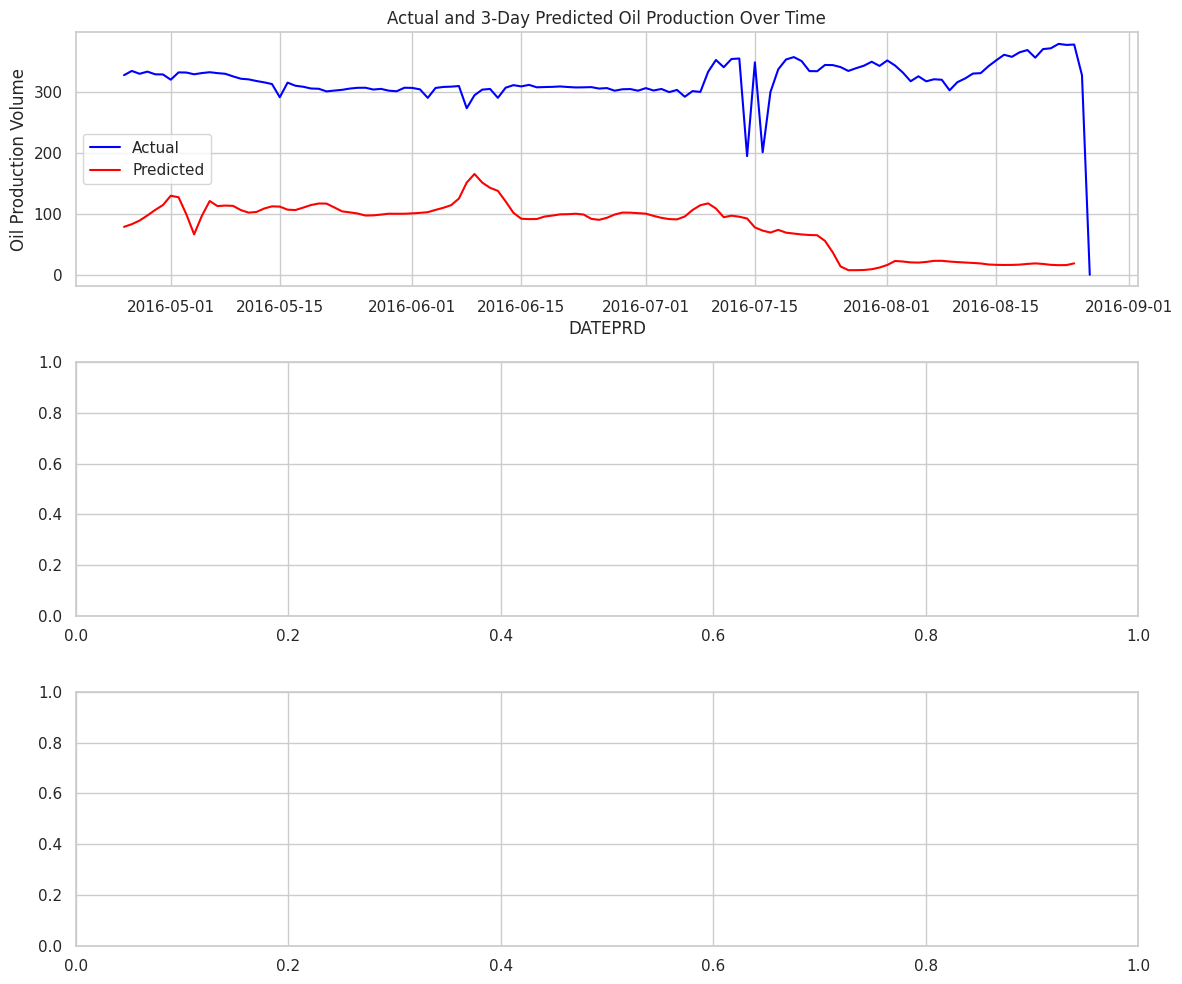

In [57]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

sns.lineplot(data=F5_final_data, x='DATEPRD', y='BORE_OIL_VOL', label='Actual', ax=axes[0], color='blue')
sns.lineplot(data=F5_final_data, x='DATEPRD', y='PREDICTED_OIL', label='Predicted', ax=axes[0], color='red')
axes[0].set_xlabel('DATEPRD')
axes[0].set_ylabel('Oil Production Volume')
axes[0].set_title('Actual and 3-Day Predicted Oil Production Over Time')
axes[0].legend()

# sns.lineplot(data=F5_final_data, x='DATEPRD', y='BORE_GAS_VOL', label='Actual', ax=axes[1], color='blue')
# sns.lineplot(data=F5_final_data, x='DATEPRD', y='PREDICTED_GAS', label='Predicted', ax=axes[1], color='red')
# axes[0].set_xlabel('DATEPRD')
# axes[1].set_ylabel('Gas Production Volume')
# axes[1].set_title('Predicted and Actual Gas Production Over Time')
# axes[1].legend()

# sns.lineplot(data=F5_final_data, x='DATEPRD', y='BORE_WAT_VOL', label='Actual', ax=axes[2], color='blue')
# sns.lineplot(data=F5_final_data, x='DATEPRD', y='PREDICTED_WATER', label='Predicted', ax=axes[2], color='red')
# axes[2].set_xlabel('DATEPRD')
# axes[2].set_ylabel('Water Production Volume')
# axes[2].set_title('Predicted and Actual Water Production Over Time')
# axes[2].legend()

plt.tight_layout()
plt.show()

Assuming there are no errors in the reverse scaling step, the model’s 3-day forecast severely underestimates oil production. The model forecasts a gradual decline that accelerates too early by late July 2016 compared to the actual production, which remains relatively stable (with some fluctuations) until the drop by late August 2016. The model is overfitting to the training data, which does not necessarily exhibit the same fluctuations as the data for this well. Along with exploring different model architectures, data augmentation (and/or transfer learning) to introduce this well’s behavior to the training dataset and feature engineering that captures interactions between current variables should improve the model’s forecasting and allow it to generalize better to different well characteristics.